# 00 - Introducción a NLP con HuggingFace

## Curso de LLMs y Aplicaciones de IA

**Duración estimada:** 3-4 horas

---

## Índice

1. [Introducción al ecosistema HuggingFace](#intro)
2. [Casos de uso de NLP](#casos-uso)
   - 2.1 Clasificación de texto y análisis de sentimiento
   - 2.2 Named Entity Recognition (NER)
   - 2.3 Topic Modeling
   - 2.4 Otras tareas
3. [Componentes de los pipelines de NLP](#componentes)
   - 3.1 Tokenización
   - 3.2 Modelos y arquitecturas
   - 3.3 Post-procesamiento
4. [Ejemplos prácticos con corpus real](#ejemplos)
5. [Información adicional](#adicional)

---

## Objetivos de aprendizaje

Al finalizar este notebook, serás capaz de:
- Navegar y utilizar el Model Zoo de HuggingFace
- Entender los diferentes casos de uso de NLP
- Comprender los componentes de los pipelines de NLP
- Aplicar modelos pre-entrenados a tareas reales
- Interpretar las salidas de diferentes pipelines

<a name="intro"></a>
## 1. Introducción al ecosistema HuggingFace

### ¿Qué es HuggingFace?

**HuggingFace** es una plataforma y biblioteca de código abierto que proporciona herramientas y modelos pre-entrenados para el procesamiento de lenguaje natural (NLP) y otras tareas de machine learning. Se ha convertido en el estándar de facto para trabajar con modelos Transformer y otros modelos de deep learning.

### Componentes principales del ecosistema:

1. **Transformers**: Biblioteca principal de Python para usar modelos pre-entrenados
2. **Model Hub**: Repositorio de miles de modelos pre-entrenados
3. **Datasets**: Biblioteca para cargar y procesar datasets
4. **Spaces**: Plataforma para compartir aplicaciones de ML
5. **Inference API**: API para hacer inferencia sin instalar modelos localmente

### El Model Zoo (Model Hub)

El **HuggingFace Model Hub** (https://huggingface.co/models) es un repositorio centralizado donde puedes encontrar miles de modelos pre-entrenados para diferentes tareas:

- **Clasificación de texto**: Análisis de sentimiento, detección de spam, etc.
- **NER**: Reconocimiento de entidades nombradas
- **Traducción**: Modelos multilingües
- **Generación de texto**: GPT, T5, etc.
- **Question Answering**: BERT, RoBERTa, etc.
- **Y muchas más...**

### Model Cards

Cada modelo en el Hub incluye un **Model Card** que contiene:

- **Descripción**: Qué hace el modelo y para qué tarea está diseñado
- **Uso**: Ejemplos de código para usar el modelo
- **Métricas**: Rendimiento en diferentes benchmarks
- **Limitaciones**: Qué no puede hacer el modelo
- **Bias y consideraciones éticas**: Información sobre posibles sesgos
- **Entrenamiento**: Detalles sobre cómo fue entrenado

### Acceso al Model Hub desde código

Puedes explorar modelos programáticamente usando la biblioteca `huggingface_hub`:

In [1]:
# Instalación de las bibliotecas necesarias
!pip install transformers datasets huggingface_hub torch


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from huggingface_hub import list_models, model_info
import pandas as pd

# Buscar modelos de análisis de sentimiento en español
print("=== Modelos de análisis de sentimiento ===")

sentiment_models = list(list_models(
    pipeline_tag ="text-classification",

    sort="downloads",
    direction=-1,
    limit=5
))

for model in sentiment_models:
    print(f"\nModelo: {model.id}")
    print(f"  Descargas: {model.downloads:,}")
    print(f"  URL: https://huggingface.co/{model.id}")

=== Modelos de análisis de sentimiento ===

Modelo: cardiffnlp/twitter-roberta-base-sentiment-latest
  Descargas: 4,932,492
  URL: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

Modelo: distilbert/distilbert-base-uncased-finetuned-sst-2-english
  Descargas: 4,027,017
  URL: https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

Modelo: BAAI/bge-reranker-v2-m3
  Descargas: 3,648,801
  URL: https://huggingface.co/BAAI/bge-reranker-v2-m3

Modelo: ProsusAI/finbert
  Descargas: 3,118,291
  URL: https://huggingface.co/ProsusAI/finbert

Modelo: microsoft/deberta-xlarge-mnli
  Descargas: 1,839,350
  URL: https://huggingface.co/microsoft/deberta-xlarge-mnli


In [10]:
# Obtener información detallada de un modelo específico
model_id = "dccuchile/bert-base-spanish-wwm-uncased"
info = model_info(model_id)

print(f"=== Información del modelo: {model_id} ===")
print(f"\nDescripción:\n{info.card_data.get('model_details', {}).get('description', 'No disponible')}")
print(f"\nTareas soportadas: {', '.join(info.tags)}")
print(f"\nDescargas: {info.downloads:,}")
print(f"\nURL del Model Card: https://huggingface.co/{model_id}")

=== Información del modelo: dccuchile/bert-base-spanish-wwm-uncased ===

Descripción:
No disponible

Tareas soportadas: transformers, pytorch, tf, jax, bert, fill-mask, masked-lm, es, arxiv:1904.09077, arxiv:1906.01502, arxiv:1812.10464, arxiv:1901.07291, arxiv:1904.02099, arxiv:1906.01569, arxiv:1908.11828, endpoints_compatible, deploy:azure, region:us

Descargas: 849,394

URL del Model Card: https://huggingface.co/dccuchile/bert-base-spanish-wwm-uncased


<a name="casos-uso"></a>
## 2. Casos de uso de NLP

El procesamiento de lenguaje natural abarca múltiples tareas. A continuación veremos las principales y cómo abordarlas con HuggingFace.

### 2.1 Clasificación de texto y análisis de sentimiento

La **clasificación de texto** consiste en asignar una etiqueta o categoría a un texto. El **análisis de sentimiento** es un caso particular donde clasificamos textos según su polaridad (positivo, negativo, neutro).

In [11]:
from transformers import pipeline

# Pipeline de análisis de sentimiento en español
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    device=-1  # CPU, usar 0 para GPU
)

# Ejemplos de textos
textos = [
    "Me encanta este producto, es increíble!",
    "No estoy satisfecho con la calidad del servicio",
    "El producto es aceptable, nada especial"
]

print("=== Análisis de Sentimiento ===")
for texto in textos:
    resultado = sentiment_analyzer(texto)
    print(f"\nTexto: {texto}")
    print(f"Resultado: {resultado}")

C:\git\docencia\iniciacion_NLP_LLM\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frane\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|██████████████████████████████████████████████████████████

=== Análisis de Sentimiento ===

Texto: Me encanta este producto, es increíble!
Resultado: [{'label': '5 stars', 'score': 0.909263014793396}]

Texto: No estoy satisfecho con la calidad del servicio
Resultado: [{'label': '2 stars', 'score': 0.4958324730396271}]

Texto: El producto es aceptable, nada especial
Resultado: [{'label': '3 stars', 'score': 0.6415975093841553}]


### 2.2 Named Entity Recognition (NER)

El **NER** identifica y clasifica entidades nombradas en el texto (personas, organizaciones, ubicaciones, fechas, etc.).

In [12]:
# Pipeline de NER en español
ner_pipeline = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    aggregation_strategy="simple",
    device=-1
)

texto_ner = """
María García trabaja en la Universidad de Madrid desde 2020. 
La empresa Microsoft anunció sus nuevas oficinas en Barcelona el 15 de marzo.
"""

print("=== Named Entity Recognition ===")
print(f"\nTexto:\n{texto_ner}")
resultados = ner_pipeline(texto_ner)

print("\nEntidades encontradas:")
for entidad in resultados:
    print(f"  {entidad['word']}: {entidad['entity_group']} (confianza: {entidad['score']:.3f})")

C:\git\docencia\iniciacion_NLP_LLM\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frane\.cache\huggingface\hub\models--mrm8488--bert-spanish-cased-finetuned-ner. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|██████████████████████████████████████████████████████████████████

=== Named Entity Recognition ===

Texto:

María García trabaja en la Universidad de Madrid desde 2020. 
La empresa Microsoft anunció sus nuevas oficinas en Barcelona el 15 de marzo.


Entidades encontradas:
  María García: PER (confianza: 0.999)
  Universidad de Madrid: ORG (confianza: 0.944)
  Microsoft: ORG (confianza: 0.893)
  Barcelona: LOC (confianza: 1.000)


### 2.3 Topic Modeling

El **Topic Modeling** identifica temas principales en una colección de documentos. Aunque tradicionalmente se usa con técnicas como LDA, también podemos usar modelos Transformer.

In [13]:
# Para topic modeling, podemos usar embeddings y clustering
from transformers import pipeline
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Pipeline de embeddings
embedder = pipeline(
    "feature-extraction",
    model="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    device=-1
)

# Corpus de ejemplo: artículos sobre diferentes temas
documentos = [
    "El Real Madrid ganó el partido contra el Barcelona con un resultado de 3-1",
    "La inteligencia artificial está revolucionando la medicina moderna",
 "El Barcelona perdió contra el Real Madrid en el último clásico",
    "Los nuevos avances en machine learning mejoran el diagnóstico médico",
    "El cambio climático afecta gravemente a los ecosistemas marinos",
    "Las emisiones de CO2 han aumentado significativamente este año"
]

# Obtener embeddings
print("=== Topic Modeling con Embeddings ===")
embeddings = []
for doc in documentos:
    emb = embedder(doc)
    # Tomar el embedding promedio (el modelo devuelve embeddings por token)
    embeddings.append(np.mean(emb[0], axis=0))

embeddings = np.array(embeddings)

# Clustering con K-means
n_topics = 3
kmeans = KMeans(n_clusters=n_topics, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)

# Mostrar resultados
print(f"\nDocumentos agrupados en {n_topics} temas:\n")
for i in range(n_topics):
    print(f"\nTema {i+1}:")
    docs_tema = [documentos[j] for j in range(len(documentos)) if clusters[j] == i]
    for doc in docs_tema:
        print(f"  - {doc}")

Loading weights: 100%|█████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 892.45it/s, Materializing param=pooler.dense.weight]
BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


=== Topic Modeling con Embeddings ===

Documentos agrupados en 3 temas:


Tema 1:
  - El Real Madrid ganó el partido contra el Barcelona con un resultado de 3-1
  - El Barcelona perdió contra el Real Madrid en el último clásico

Tema 2:
  - El cambio climático afecta gravemente a los ecosistemas marinos
  - Las emisiones de CO2 han aumentado significativamente este año

Tema 3:
  - La inteligencia artificial está revolucionando la medicina moderna
  - Los nuevos avances en machine learning mejoran el diagnóstico médico


### 2.4 Otras tareas comunes

HuggingFace soporta muchas otras tareas:

- **Question Answering**: Responder preguntas basándose en un contexto
- **Traducción**: Traducir texto entre idiomas
- **Resumen de texto**: Generar resúmenes automáticos
- **Generación de texto**: Crear texto nuevo
- **Zero-shot classification**: Clasificar sin entrenamiento previo

In [14]:
# Zero-shot classification: clasificar sin entrenar
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=-1
)

texto = "El Real Madrid ganó la Champions League"
candidatos = ["deportes", "tecnología", "política", "entretenimiento"]

resultado = classifier(texto, candidate_labels=candidatos)

print("=== Zero-Shot Classification ===")
print(f"\nTexto: {texto}")
print(f"\nEtiquetas candidatas: {candidatos}")
print(f"\nResultado:")
for label, score in zip(resultado['labels'], resultado['scores']):
    print(f"  {label}: {score:.3f}")

C:\git\docencia\iniciacion_NLP_LLM\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frane\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|████████████████████████████████████████████████████████████████████| 515/515 [00:

=== Zero-Shot Classification ===

Texto: El Real Madrid ganó la Champions League

Etiquetas candidatas: ['deportes', 'tecnología', 'política', 'entretenimiento']

Resultado:
  entretenimiento: 0.351
  política: 0.348
  deportes: 0.157
  tecnología: 0.144


<a name="componentes"></a>
## 3. Componentes de los pipelines de NLP

Un **pipeline** de HuggingFace es una abstracción de alto nivel que combina varios componentes. Veamos qué hay detrás:

### 3.1 Tokenización

La **tokenización** es el proceso de dividir el texto en unidades más pequeñas (tokens). Diferentes modelos usan diferentes tokenizadores:

- **WordPiece** (BERT): Divide palabras en subpalabras
- **BPE** (GPT): Byte Pair Encoding
- **SentencePiece** (T5, mBERT): Maneja mejor múltiples idiomas

In [15]:
from transformers import AutoTokenizer

# Comparar diferentes tokenizadores
texto = "Hola, ¿cómo estás? Me llamo María y vivo en Madrid."

print("=== Comparación de Tokenizadores ===")
print(f"\nTexto original:\n{texto}\n")

# Tokenizador BERT (WordPiece)
tokenizer_bert = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
tokens_bert = tokenizer_bert.tokenize(texto)
ids_bert = tokenizer_bert.encode(texto)

print("BERT (WordPiece):")
print(f"  Tokens: {tokens_bert}")
print(f"  Número de tokens: {len(tokens_bert)}")
print(f"  IDs: {ids_bert[:10]}... (mostrando primeros 10)")

# Tokenizador GPT-2 (BPE)
tokenizer_gpt = AutoTokenizer.from_pretrained("gpt2")
tokens_gpt = tokenizer_gpt.tokenize(texto)
ids_gpt = tokenizer_gpt.encode(texto)

print("\nGPT-2 (BPE):")
print(f"  Tokens: {tokens_gpt}")
print(f"  Número de tokens: {len(tokens_gpt)}")
print(f"  IDs: {ids_gpt[:10]}... (mostrando primeros 10)")

=== Comparación de Tokenizadores ===

Texto original:
Hola, ¿cómo estás? Me llamo María y vivo en Madrid.



C:\git\docencia\iniciacion_NLP_LLM\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frane\.cache\huggingface\hub\models--dccuchile--bert-base-spanish-wwm-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


BERT (WordPiece):
  Tokens: ['hola', ',', '¿', 'cómo', 'estás', '?', 'me', 'llamo', 'maría', 'y', 'vivo', 'en', 'madrid', '.']
  Número de tokens: 14
  IDs: [4, 1734, 1019, 1063, 1475, 1499, 1059, 1094, 5592, 4128]... (mostrando primeros 10)


C:\git\docencia\iniciacion_NLP_LLM\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\frane\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)



GPT-2 (BPE):
  Tokens: ['H', 'ola', ',', 'ĠÂ', '¿', 'c', 'Ã³', 'mo', 'Ġest', 'Ã¡s', '?', 'ĠMe', 'Ġll', 'amo', 'ĠMar', 'ÃŃa', 'Ġy', 'Ġvivo', 'Ġen', 'ĠMadrid', '.']
  Número de tokens: 21
  IDs: [39, 5708, 11, 1587, 123, 66, 10205, 5908, 1556, 40138]... (mostrando primeros 10)


In [16]:
# Visualizar cómo se tokeniza una palabra específica
palabras_complejas = ["Madrid", "inteligencia", "desarrolladores", "transformers"]

print("=== Tokenización de palabras complejas ===")
for palabra in palabras_complejas:
    tokens = tokenizer_bert.tokenize(palabra)
    print(f"\n'{palabra}' → {tokens} ({len(tokens)} tokens)")
    
    # Mostrar los IDs correspondientes
    ids = tokenizer_bert.convert_tokens_to_ids(tokens)
    print(f"  IDs: {ids}")

=== Tokenización de palabras complejas ===

'Madrid' → ['madrid'] (1 tokens)
  IDs: [4555]

'inteligencia' → ['inteligencia'] (1 tokens)
  IDs: [6872]

'desarrolladores' → ['desarrolladores'] (1 tokens)
  IDs: [27652]

'transformers' → ['transform', '##ers'] (2 tokens)
  IDs: [5091, 1917]


### 3.2 Modelos y arquitecturas

Los modelos Transformer tienen diferentes arquitecturas según la tarea:

- **Encoder-only** (BERT, RoBERTa): Mejor para clasificación, NER, QA
- **Decoder-only** (GPT): Mejor para generación de texto
- **Encoder-Decoder** (T5, BART): Mejor para traducción, resumen

In [17]:
from transformers import AutoModel, AutoModelForSequenceClassification
import torch

# Cargar un modelo BERT (encoder-only)
print("=== Arquitectura del modelo ===")
model_name = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

print(f"\nModelo: {model_name}")
print(f"Tipo: {type(model).__name__}")
print(f"\nEstructura del modelo:")
print(model)

=== Arquitectura del modelo ===


Loading weights: 100%|███████████████████████████████████████████████████| 197/197 [00:00<00:00, 1147.86it/s, Materializing param=encoder.layer.11.output.dense.weight]
BertModel LOAD REPORT from: dccuchile/bert-base-spanish-wwm-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.decoder.bias               | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
bert.embeddings.position_ids               | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.decoder.weight             | UNEXPECTED | 
pooler.dense.weight                        | MISSING    | 
pooler.dense.bias                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from d


Modelo: dccuchile/bert-base-spanish-wwm-uncased
Tipo: BertModel

Estructura del modelo:
BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), ep

In [18]:
# Ver las dimensiones de las salidas
texto = "Este es un texto de ejemplo"
inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model(**inputs)

print("=== Dimensiones de salida ===")
print(f"\nEntrada (input_ids): {inputs['input_ids'].shape}")
print(f"\nSalida (last_hidden_state): {outputs.last_hidden_state.shape}")
print(f"  - Batch size: {outputs.last_hidden_state.shape[0]}")
print(f"  - Sequence length: {outputs.last_hidden_state.shape[1]}")
print(f"  - Hidden size: {outputs.last_hidden_state.shape[2]}")
print(f"\nPooler output: {outputs.pooler_output.shape if hasattr(outputs, 'pooler_output') else 'No disponible'}")

=== Dimensiones de salida ===

Entrada (input_ids): torch.Size([1, 8])

Salida (last_hidden_state): torch.Size([1, 8, 768])
  - Batch size: 1
  - Sequence length: 8
  - Hidden size: 768

Pooler output: torch.Size([1, 768])


### 3.3 Post-procesamiento

El post-procesamiento convierte las salidas del modelo en resultados interpretables:

- **Clasificación**: Softmax para obtener probabilidades
- **NER**: Agregación de tokens en entidades completas
- **Generación**: Decodificación de tokens a texto

In [19]:
import torch.nn.functional as F

# Ejemplo: post-procesamiento manual para clasificación
model_classifier = AutoModelForSequenceClassification.from_pretrained(
    "nlptown/bert-base-multilingual-uncased-sentiment"
)
tokenizer_classifier = AutoTokenizer.from_pretrained(
    "nlptown/bert-base-multilingual-uncased-sentiment"
)

texto = "Me encanta este producto"
inputs = tokenizer_classifier(texto, return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model_classifier(**inputs)
    logits = outputs.logits
    
    # Aplicar softmax para obtener probabilidades
    probabilidades = F.softmax(logits, dim=-1)
    
    # Obtener la clase predicha
    clase_predicha = torch.argmax(probabilidades, dim=-1).item()

print("=== Post-procesamiento manual ===")
print(f"\nTexto: {texto}")
print(f"\nLogits (antes de softmax): {logits[0].tolist()}")
print(f"\nProbabilidades (después de softmax): {probabilidades[0].tolist()}")
print(f"\nClase predicha: {clase_predicha}")
print(f"Probabilidad de la clase predicha: {probabilidades[0][clase_predicha]:.4f}")

Loading weights: 100%|██████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 1019.49it/s, Materializing param=classifier.weight]


=== Post-procesamiento manual ===

Texto: Me encanta este producto

Logits (antes de softmax): [-2.0774283409118652, -2.35190486907959, -0.33126261830329895, 1.3545162677764893, 2.766355514526367]

Probabilidades (después de softmax): [0.006046750117093325, 0.0045953476801514626, 0.03466348350048065, 0.18706676363945007, 0.7676276564598083]

Clase predicha: 4
Probabilidad de la clase predicha: 0.7676


<a name="ejemplos"></a>
## 4. Ejemplos prácticos con corpus real

Ahora vamos a trabajar con un corpus real y aplicar diferentes pipelines para ver qué información proporcionan.

In [20]:
# Corpus de ejemplo: reseñas de productos
corpus = [
    "El iPhone 15 tiene una excelente cámara y batería duradera. Sin embargo, el precio es muy alto.",
    "Samsung Galaxy S24: pantalla increíble y rendimiento rápido. La interfaz es intuitiva.",
    "El servicio de atención al cliente fue terrible. No respondieron mis consultas durante días.",
    "Producto defectuoso desde el primer día. No recomiendo esta marca para nada.",
    "La entrega fue rápida y el producto llegó en perfectas condiciones. Muy satisfecho.",
    "Barcelona es una ciudad hermosa con arquitectura gótica y playas increíbles.",
    "El Real Madrid ganó la Champions League en 2022 con una actuación memorable.",
    "La inteligencia artificial está transformando la industria tecnológica."
]

print("=== Corpus de ejemplo ===")
for i, texto in enumerate(corpus, 1):
    print(f"{i}. {texto}")

=== Corpus de ejemplo ===
1. El iPhone 15 tiene una excelente cámara y batería duradera. Sin embargo, el precio es muy alto.
2. Samsung Galaxy S24: pantalla increíble y rendimiento rápido. La interfaz es intuitiva.
3. El servicio de atención al cliente fue terrible. No respondieron mis consultas durante días.
4. Producto defectuoso desde el primer día. No recomiendo esta marca para nada.
5. La entrega fue rápida y el producto llegó en perfectas condiciones. Muy satisfecho.
6. Barcelona es una ciudad hermosa con arquitectura gótica y playas increíbles.
7. El Real Madrid ganó la Champions League en 2022 con una actuación memorable.
8. La inteligencia artificial está transformando la industria tecnológica.


In [21]:
# 1. Análisis de sentimiento en todo el corpus
print("=== 1. ANÁLISIS DE SENTIMIENTO ===\n")
sentiment_pipeline = pipeline("sentiment-analysis", 
                             model="nlptown/bert-base-multilingual-uncased-sentiment",
                             device=-1)

for i, texto in enumerate(corpus, 1):
    resultado = sentiment_pipeline(texto)
    print(f"{i}. {texto[:60]}...")
    print(f"   → {resultado[0]['label']}: {resultado[0]['score']:.3f}\n")

=== 1. ANÁLISIS DE SENTIMIENTO ===



Loading weights: 100%|███████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 881.58it/s, Materializing param=classifier.weight]


1. El iPhone 15 tiene una excelente cámara y batería duradera. ...
   → 3 stars: 0.537

2. Samsung Galaxy S24: pantalla increíble y rendimiento rápido....
   → 5 stars: 0.825

3. El servicio de atención al cliente fue terrible. No respondi...
   → 1 star: 0.801

4. Producto defectuoso desde el primer día. No recomiendo esta ...
   → 1 star: 0.948

5. La entrega fue rápida y el producto llegó en perfectas condi...
   → 5 stars: 0.776

6. Barcelona es una ciudad hermosa con arquitectura gótica y pl...
   → 5 stars: 0.781

7. El Real Madrid ganó la Champions League en 2022 con una actu...
   → 5 stars: 0.634

8. La inteligencia artificial está transformando la industria t...
   → 5 stars: 0.561



In [22]:
# 2. Named Entity Recognition
print("=== 2. NAMED ENTITY RECOGNITION ===\n")
ner_pipeline = pipeline("ner",
                       model="mrm8488/bert-spanish-cased-finetuned-ner",
                       aggregation_strategy="simple",
                       device=-1)

for i, texto in enumerate(corpus, 1):
    entidades = ner_pipeline(texto)
    if entidades:
        print(f"{i}. {texto}")
        print(f"   Entidades encontradas:")
        for ent in entidades:
            print(f"     - {ent['word']} ({ent['entity_group']}, confianza: {ent['score']:.3f})")
        print()

=== 2. NAMED ENTITY RECOGNITION ===



Loading weights: 100%|███████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 859.34it/s, Materializing param=classifier.weight]
BertForTokenClassification LOAD REPORT from: mrm8488/bert-spanish-cased-finetuned-ner
Key                      | Status     |  | 
-------------------------+------------+--+-
bert.pooler.dense.weight | UNEXPECTED |  | 
bert.pooler.dense.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


1. El iPhone 15 tiene una excelente cámara y batería duradera. Sin embargo, el precio es muy alto.
   Entidades encontradas:
     - iPhone 15 (MISC, confianza: 0.718)

2. Samsung Galaxy S24: pantalla increíble y rendimiento rápido. La interfaz es intuitiva.
   Entidades encontradas:
     - Samsung Galaxy S24 (MISC, confianza: 0.732)

6. Barcelona es una ciudad hermosa con arquitectura gótica y playas increíbles.
   Entidades encontradas:
     - Barcelona (LOC, confianza: 1.000)

7. El Real Madrid ganó la Champions League en 2022 con una actuación memorable.
   Entidades encontradas:
     - Real Madrid (ORG, confianza: 0.999)
     - Champions League (MISC, confianza: 0.999)



In [23]:
# 3. Extracción de características (embeddings)
print("=== 3. EMBEDDINGS (Representación vectorial) ===\n")
from transformers import pipeline
import numpy as np

embedder = pipeline("feature-extraction",
                   model="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
                   device=-1)

# Obtener embeddings para cada documento
embeddings_corpus = []
for texto in corpus:
    emb = embedder(texto)
    # Promediar los embeddings de los tokens para obtener un embedding del documento
    doc_embedding = np.mean(emb[0], axis=0)
    embeddings_corpus.append(doc_embedding)

embeddings_corpus = np.array(embeddings_corpus)

print(f"Dimensiones de los embeddings: {embeddings_corpus.shape}")
print(f"Cada documento está representado por un vector de {embeddings_corpus.shape[1]} dimensiones\n")

# Calcular similitud entre documentos
from sklearn.metrics.pairwise import cosine_similarity
similitudes = cosine_similarity(embeddings_corpus)

print("Matriz de similitud (primeros 5 documentos):")
print(similitudes[:5, :5])

# Encontrar documentos más similares
print("\nDocumentos más similares (excluyendo diagonal):")
for i in range(min(3, len(corpus))):
    sims = similitudes[i].copy()
    sims[i] = -1  # Excluir el mismo documento
    j = np.argmax(sims)
    print(f"\nDocumento {i+1}: {corpus[i][:50]}...")
    print(f"Más similar a: {corpus[j][:50]}... (similitud: {sims[j]:.3f})")

=== 3. EMBEDDINGS (Representación vectorial) ===



Loading weights: 100%|█████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 755.30it/s, Materializing param=pooler.dense.weight]
BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Dimensiones de los embeddings: (8, 384)
Cada documento está representado por un vector de 384 dimensiones

Matriz de similitud (primeros 5 documentos):
[[ 1.          0.40398296 -0.07352556  0.17643039  0.23507622]
 [ 0.40398296  1.         -0.0287657   0.20563241  0.2592157 ]
 [-0.07352556 -0.0287657   1.          0.16119766 -0.06767693]
 [ 0.17643039  0.20563241  0.16119766  1.          0.20061378]
 [ 0.23507622  0.2592157  -0.06767693  0.20061378  1.        ]]

Documentos más similares (excluyendo diagonal):

Documento 1: El iPhone 15 tiene una excelente cámara y batería ...
Más similar a: Samsung Galaxy S24: pantalla increíble y rendimien... (similitud: 0.404)

Documento 2: Samsung Galaxy S24: pantalla increíble y rendimien...
Más similar a: El iPhone 15 tiene una excelente cámara y batería ... (similitud: 0.404)

Documento 3: El servicio de atención al cliente fue terrible. N...
Más similar a: Producto defectuoso desde el primer día. No recomi... (similitud: 0.161)


In [24]:
# 4. Zero-shot classification para categorizar documentos
print("=== 4. ZERO-SHOT CLASSIFICATION ===\n")
zero_shot = pipeline("zero-shot-classification",
                    model="facebook/bart-large-mnli",
                    device=-1)

categorias = ["tecnología", "deportes", "viajes", "servicio al cliente", "productos"]

for i, texto in enumerate(corpus[:5], 1):  # Primeros 5 documentos
    resultado = zero_shot(texto, candidate_labels=categorias)
    print(f"{i}. {texto}")
    print(f"   Categorías predichas:")
    for label, score in zip(resultado['labels'][:3], resultado['scores'][:3]):
        print(f"     - {label}: {score:.3f}")
    print()

=== 4. ZERO-SHOT CLASSIFICATION ===



Loading weights: 100%|█████████████████████████████████████████████████████████████████████| 515/515 [00:00<00:00, 691.89it/s, Materializing param=model.shared.weight]


1. El iPhone 15 tiene una excelente cámara y batería duradera. Sin embargo, el precio es muy alto.
   Categorías predichas:
     - tecnología: 0.385
     - productos: 0.372
     - servicio al cliente: 0.174

2. Samsung Galaxy S24: pantalla increíble y rendimiento rápido. La interfaz es intuitiva.
   Categorías predichas:
     - productos: 0.448
     - tecnología: 0.318
     - servicio al cliente: 0.171

3. El servicio de atención al cliente fue terrible. No respondieron mis consultas durante días.
   Categorías predichas:
     - servicio al cliente: 0.938
     - productos: 0.032
     - viajes: 0.014

4. Producto defectuoso desde el primer día. No recomiendo esta marca para nada.
   Categorías predichas:
     - productos: 0.887
     - servicio al cliente: 0.059
     - viajes: 0.021

5. La entrega fue rápida y el producto llegó en perfectas condiciones. Muy satisfecho.
   Categorías predichas:
     - servicio al cliente: 0.527
     - productos: 0.394
     - tecnología: 0.035



=== 5. VISUALIZACIÓN DE EMBEDDINGS (PCA) ===



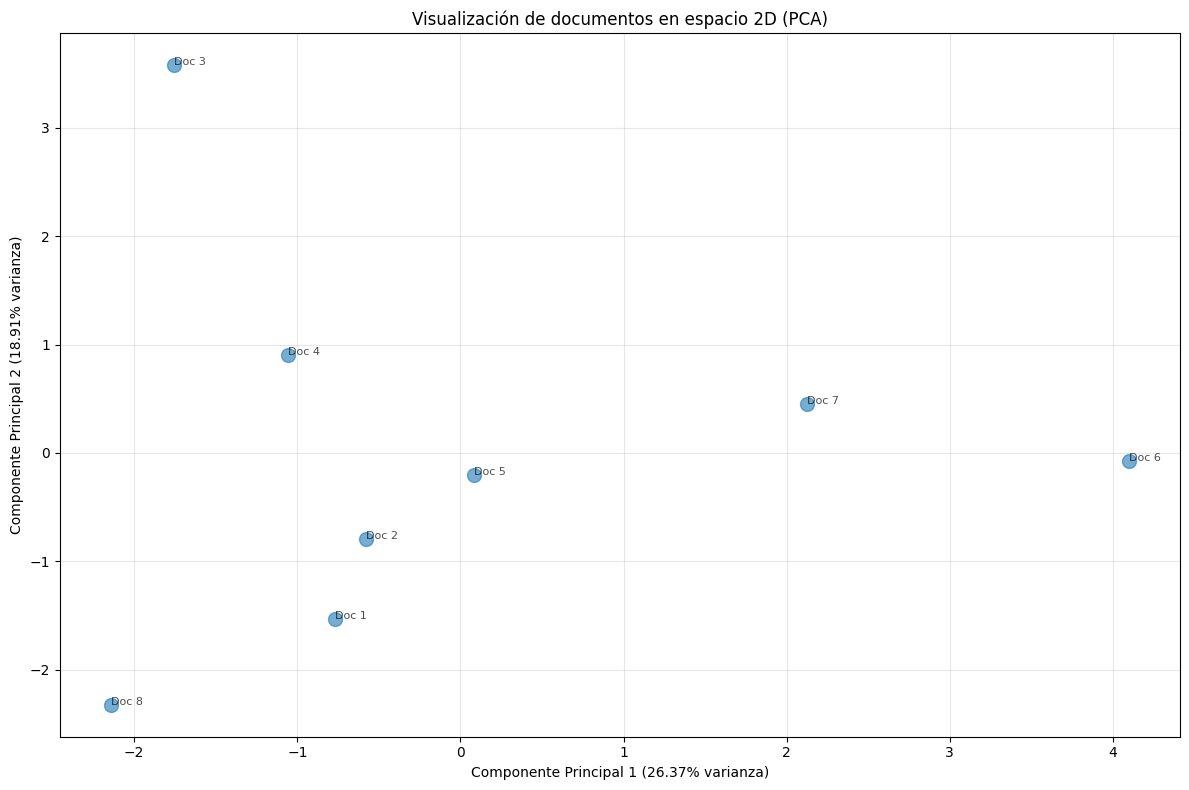

Varianza explicada: 45.28%


In [25]:
# 5. Visualización de embeddings con PCA
print("=== 5. VISUALIZACIÓN DE EMBEDDINGS (PCA) ===\n")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2D para visualización
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_corpus)

# Crear visualización
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=100, alpha=0.6)

# Etiquetar puntos
for i, texto in enumerate(corpus):
    plt.annotate(f"Doc {i+1}", (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                fontsize=8, alpha=0.7)

plt.xlabel(f"Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2%} varianza)")
plt.ylabel(f"Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2%} varianza)")
plt.title("Visualización de documentos en espacio 2D (PCA)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Varianza explicada: {pca.explained_variance_ratio_.sum():.2%}")

<a name="adicional"></a>
## 5. Información adicional

### 5.1 Uso de GPU vs CPU

HuggingFace puede usar GPU para acelerar la inferencia. Para especificar el dispositivo:

- `device=-1`: CPU (por defecto)
- `device=0`: Primera GPU
- `device=1`: Segunda GPU (si hay múltiples)

In [26]:
import torch

print("=== Información del dispositivo ===")
print(f"CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Número de GPUs: {torch.cuda.device_count()}")
    print(f"GPU actual: {torch.cuda.get_device_name(0)}")
    print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("Usando CPU")

=== Información del dispositivo ===
CUDA disponible: False
Usando CPU


### 5.2 Procesamiento por lotes (batching)

Para procesar múltiples textos eficientemente, puedes usar procesamiento por lotes:

In [27]:
import time

# Comparar procesamiento individual vs por lotes
sentiment_pipeline = pipeline("sentiment-analysis",
                             model="nlptown/bert-base-multilingual-uncased-sentiment",
                             device=-1)

textos_lote = corpus[:5]

# Procesamiento individual
inicio = time.time()
resultados_individual = [sentiment_pipeline(texto) for texto in textos_lote]
tiempo_individual = time.time() - inicio

# Procesamiento por lotes
inicio = time.time()
resultados_lote = sentiment_pipeline(textos_lote)
tiempo_lote = time.time() - inicio

print("=== Comparación: Individual vs Lotes ===")
print(f"\nTiempo individual: {tiempo_individual:.3f} segundos")
print(f"Tiempo por lotes: {tiempo_lote:.3f} segundos")
print(f"\nAceleración: {tiempo_individual/tiempo_lote:.2f}x más rápido con lotes")

Loading weights: 100%|███████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 784.65it/s, Materializing param=classifier.weight]


=== Comparación: Individual vs Lotes ===

Tiempo individual: 0.179 segundos
Tiempo por lotes: 0.135 segundos

Aceleración: 1.33x más rápido con lotes


### 5.3 Guardar y cargar modelos localmente

Puedes guardar modelos y tokenizadores localmente para uso offline:

In [28]:
from transformers import AutoTokenizer, AutoModel
import os

# Guardar modelo y tokenizador
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
save_path = "./modelo_local"

print("=== Guardar modelo localmente ===")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer.save_pretrained(save_path)
model.save_pretrained(save_path)

print(f"Modelo guardado en: {save_path}")
print(f"Archivos creados: {os.listdir(save_path)}")

# Cargar desde local
print("\n=== Cargar desde local ===")
tokenizer_local = AutoTokenizer.from_pretrained(save_path)
model_local = AutoModel.from_pretrained(save_path)
print("Modelo cargado exitosamente desde disco local")

=== Guardar modelo localmente ===


Loading weights: 100%|█████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 759.04it/s, Materializing param=pooler.dense.weight]
BertModel LOAD REPORT from: nlptown/bert-base-multilingual-uncased-sentiment
Key               | Status     |  | 
------------------+------------+--+-
classifier.weight | UNEXPECTED |  | 
classifier.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Writing model shards: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.42it/s]


Modelo guardado en: ./modelo_local
Archivos creados: ['config.json', 'model.safetensors', 'tokenizer.json', 'tokenizer_config.json']

=== Cargar desde local ===


Loading weights: 100%|█████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 694.66it/s, Materializing param=pooler.dense.weight]


Modelo cargado exitosamente desde disco local


### 5.4 Consideraciones de rendimiento

- **Modelos más pequeños**: Más rápidos pero menos precisos (p. ej., `distilbert`)
- **Modelos más grandes**: Más lentos pero más precisos (p. ej., `bert-large`)
- **Quantization**: Reducir precisión (float32 → float16) puede acelerar sin mucha pérdida
- **ONNX Runtime**: Usar modelos optimizados para producción

In [29]:
# Comparar tamaños de modelos
from huggingface_hub import model_info

modelos_comparar = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased"
]

print("=== Comparación de tamaños de modelos ===\n")
for model_id in modelos_comparar:
    try:
        info = model_info(model_id)
        print(f"{model_id}:")
        print(f"  Descargas: {info.downloads:,}")
        # El tamaño del modelo se puede obtener de los archivos
        print()
    except:
        print(f"{model_id}: Información no disponible\n")

=== Comparación de tamaños de modelos ===

distilbert-base-uncased:
  Descargas: 6,227,759

bert-base-uncased:
  Descargas: 46,750,701

bert-large-uncased:
  Descargas: 458,700



### 5.5 Recursos adicionales

- **Documentación oficial**: https://huggingface.co/docs/transformers
- **Model Hub**: https://huggingface.co/models
- **Datasets Hub**: https://huggingface.co/datasets
- **Course de HuggingFace**: https://huggingface.co/course
- **Spaces**: https://huggingface.co/spaces (aplicaciones de ejemplo)

### Resumen

En este notebook hemos visto:

1. ✅ Cómo navegar y usar el ecosistema HuggingFace
2. ✅ Diferentes casos de uso de NLP (sentimiento, NER, topic modeling, etc.)
3. ✅ Componentes de los pipelines (tokenización, modelos, post-procesamiento)
4. ✅ Ejemplos prácticos con corpus real
5. ✅ Información adicional sobre optimización y mejores prácticas

¡Ahora estás listo para explorar y usar modelos de HuggingFace en tus propios proyectos!